### Integrate Prophet with UI

In [ ]:
import pandas as pd
from prophet.serialize import model_from_json

In [ ]:
fn = 'CA33_8H'
forecast_periods = 3 # decide how far you want to forecast

t_res = fn.split('_')[-1]
ca = int(fn.split('_')[0].split('CA')[-1])

with open(f'/content/drive/MyDrive/prophet_models/{fn}.json', 'r') as fin:
    m = model_from_json(fin.read())  

model_files_df = pd.read_pickle('/content/drive/MyDrive/prophet_models/prophet_model_files.pkl')
model_file = model_files_df[model_files_df['ca']==ca]
scaler = model_file['scaler'].iloc[0]
train_exog = model_file['train_exog'].iloc[0]

In [ ]:
future = m.make_future_dataframe(periods=forecast_periods, freq=t_res)
future_rows = future.merge(train_exog['ds'], how='left', indicator=True)
future_rows = future_rows[future_rows['_merge'] == 'left_only']
future_exog = future_rows[['ds']]

# add the future exog
##################################
future_exog['bulls'] = [0, 1, 0]
future_exog['cubs'] = [0, 1, 0]
future_exog['sox'] = [0, 1, 0]
future_exog['bears'] = [0, 1, 0]
future_exog['temp'] = [0, 1, 0]
future_exog['wind'] = [0, 1, 0]
future_exog['rain'] = [0, 1, 0]
future_exog['snow'] = [0, 1, 0]
##################################

cols2scale = ['temp', 'wind', 'rain', 'snow']
future_exog[cols2scale] = scaler.transform(future_exog[cols2scale])
exog_all = pd.concat([train_exog, future_exog])
future = future.merge(exog_all, how='left', on='ds')
forecast = m.predict(future)

,ds,yhat
21746,2022-11-05 16:00:00,2.340736
21747,2022-11-06 00:00:00,0.778126
21748,2022-11-06 08:00:00,3.945933
21749,2022-11-06 16:00:00,3.767004
21750,2022-11-07 00:00:00,0.843922
21751,2022-11-07 08:00:00,2.483538
21752,2022-11-07 16:00:00,2.377289
21753,2022-11-08 00:00:00,0.942225
21754,2022-11-08 08:00:00,4.773127
21755,2022-11-08 16:00:00,2.363031


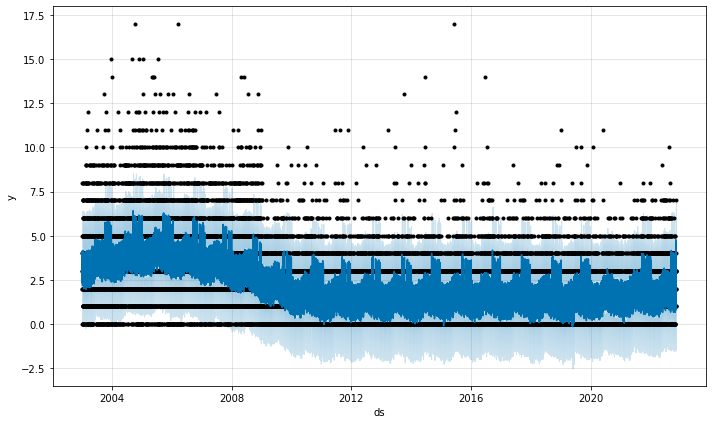

In [ ]:
m.plot(forecast);
forecast[['ds', 'yhat']].tail(10) # yhat = prediction